In [ ]:
from prettytable import PrettyTable
import requests
import graphviz

In [ ]:
# Define las palabras reservadas de ANSI C
reserved_words_c = ['auto', 'break', 'case', 'char', 'const', 'continue', 'default', 'do', 'double', 'else', 'enum',
                    'extern', 'float', 'for', 'goto', 'if', 'int', 'long', 'register', 'return', 'short', 'signed',
                    'sizeof', 'static', 'struct', 'switch', 'typedef', 'union', 'unsigned', 'void', 'volatile', 'while']

In [ ]:
def DFA_search_engine(text, words_to_search):

    """
    Keyword search in the text using a deterministic finite automaton.

     Args:
         text (str): The text on which the search will be performed.
         words_to_search (list): List of keywords to search.

     Returns:
         list: List of keywords found in the text.
         list: History of processed states and characters.
     """

    # q0 -> We are in a word
    # q1 -> We are not in a word

    state = "q0" #Initial state
    current_word = ""
    words_result = [] #Store the words found in the text
    history_results = []#Stores the history of processed states and characters

    for character in text:
        # If the character is a letter or underscore
        if character.isalpha() or character == '_':
            current_word += character
        # If the character is not a letter or underscore
        else:
            # if the current state is 2 and the current word is in the list of words to search, it is added to words_result
            if state == "q1" and current_word in words_to_search:
                words_result.append(current_word)
            current_word = "" #Reset current word
            state = "q0"

        if state == "q0" and character == ' ':
            state = "q0"
        elif state == "q0" and character.isalpha():
            state = "q1"

        history_results.append((character,state))
    if state == "q1" and current_word in words_to_search:
        words_result.append(current_word)

    return words_result, history_results

In [ ]:
def visualizar_automata():
    # Crea un objeto Digraph de Graphviz
    dot = graphviz.Digraph(comment='Autómata de Búsqueda de Palabras')

    # Define los estados del autómata
    dot.node('1', label='q0')
    dot.node('2', label='q1')

    # Define las transiciones entre estados
    dot.edge('1', '1', label='space')
    dot.edge('1', '2', label='letter')
    dot.edge('2', '1', label='  not letter')

    # Renderiza el diagrama y muéstralo en la salida
    dot.render('automata', format='png')
    return dot

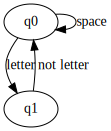

In [ ]:
automata_diagram = visualizar_automata()
automata_diagram

In [ ]:
words_result, history_results = DFA_search_engine("El problema de la mochila algorítmica (y su implementación en Python) es interesante y es parte del primer programa informático y digital", ["problema"])

In [ ]:
words_result

['problema']

In [ ]:
history_results

[('E', 'q1'),
 ('l', 'q1'),
 (' ', 'q0'),
 ('p', 'q1'),
 ('r', 'q1'),
 ('o', 'q1'),
 ('b', 'q1'),
 ('l', 'q1'),
 ('e', 'q1'),
 ('m', 'q1'),
 ('a', 'q1'),
 (' ', 'q0'),
 ('d', 'q1'),
 ('e', 'q1'),
 (' ', 'q0'),
 ('l', 'q1'),
 ('a', 'q1'),
 (' ', 'q0'),
 ('m', 'q1'),
 ('o', 'q1'),
 ('c', 'q1'),
 ('h', 'q1'),
 ('i', 'q1'),
 ('l', 'q1'),
 ('a', 'q1'),
 (' ', 'q0'),
 ('a', 'q1'),
 ('l', 'q1'),
 ('g', 'q1'),
 ('o', 'q1'),
 ('r', 'q1'),
 ('í', 'q1'),
 ('t', 'q1'),
 ('m', 'q1'),
 ('i', 'q1'),
 ('c', 'q1'),
 ('a', 'q1'),
 (' ', 'q0'),
 ('(', 'q0'),
 ('y', 'q1'),
 (' ', 'q0'),
 ('s', 'q1'),
 ('u', 'q1'),
 (' ', 'q0'),
 ('i', 'q1'),
 ('m', 'q1'),
 ('p', 'q1'),
 ('l', 'q1'),
 ('e', 'q1'),
 ('m', 'q1'),
 ('e', 'q1'),
 ('n', 'q1'),
 ('t', 'q1'),
 ('a', 'q1'),
 ('c', 'q1'),
 ('i', 'q1'),
 ('ó', 'q1'),
 ('n', 'q1'),
 (' ', 'q0'),
 ('e', 'q1'),
 ('n', 'q1'),
 (' ', 'q0'),
 ('P', 'q1'),
 ('y', 'q1'),
 ('t', 'q1'),
 ('h', 'q1'),
 ('o', 'q1'),
 ('n', 'q1'),
 (')', 'q0'),
 (' ', 'q0'),
 ('e', 'q1'),
 ('s',

In [ ]:
def get_text_from_url(url):
  try:
    response = requests.get(url)
    response.raise_for_status()
    return response.text
  except requests.exceptions.RequestException as e:
    print(f"Error getting text from URL: {e}")
    return ""

In [ ]:
def save_results_in_table(words):
    table = PrettyTable()
    table.field_names = ["Word", "Occurrences", "Position"]

    occurrences = {word: words.count(word) for word in set(words)}

    for word, count in occurrences.items():
        positions = [i+1 for i, w in enumerate(words) if w == word]
        table.add_row([word, count, positions])

    with open("results.txt", 'w', encoding='utf-8') as f:
        f.write(str(table))

In [ ]:
def save_history_in_file(history):
    with open("history.txt", 'w', encoding='utf-8') as f:
        for letter, state in history:
            f.write(f"{letter} -> {state}\n")

In [ ]:
ExampleCode = """
#include <stdio.h>
#include <stdbool.h>

// Definición de los estados
typedef enum {
    Q0,
    Q1,
    Q2
} Estado;

// Función de transición
Estado transicion(Estado estadoActual, char entrada) {
    switch (estadoActual) {
        case Q0:
            if (entrada == '0') {
                return Q1;
            } else if (entrada == '1') {
                return Q0;
            }
            break;
        case Q1:
            if (entrada == '0') {
                return Q2;
            } else if (entrada == '1') {
                return Q0;
            }
            break;
        case Q2:
            if (entrada == '0' || entrada == '1') {
                return Q2;
            }
            break;
    }
    return estadoActual;  // Estado de error si la transición no está definida
}

int main() {
    Estado estadoActual = Q0;
    char entrada[] = "010101";  // Ejemplo de cadena de entrada

    for (int i = 0; entrada[i] != '\0'; i++) {
        estadoActual = transicion(estadoActual, entrada[i]);
    }

    // Comprobar si el estado final es un estado de aceptación
    if (estadoActual == Q2) {
        printf("Cadena aceptada.\n");
    } else {
        printf("Cadena no aceptada.\n");
    }

    return 0;
}
"""

In [ ]:
def main():
    print("-----------------------------Welcome to the search engine-----------------------------")
    url_or_example = input("Enter the 'URL' or 'EXAMPLE' to use a default example code: ")
    if url_or_example.lower() == 'example':
        source_code = ExampleCode
        words_result, history = DFA_search_engine(source_code, reserved_words_c)
    else:
        # Get text from the URL provided by the user
        url = input("Enter the URL:")
        if not url.startswith(('http://', 'https://')):
          print("Invalid URL. Please enter a valid URL starting with 'http://' or 'https://'.")
          return
        text = get_text_from_url(url)
        words_result, history = DFA_search_engine(text, reserved_words_c)

    save_results_in_table(reserved_words_c)
    save_history_in_file(history)

In [ ]:
if __name__ == "__main__":
    main()

-----------------------------Welcome to the search engine-----------------------------
Enter the 'URL' or 'EXAMPLE' to use a default example code: URL
Enter the URL:https://128mots.com/2021/03/29/problema-de-mochila-algoritmo-en-python-problema-de-mochila/
